In [62]:
import re
import pandas as pd
import numpy as np
import nltk
import datetime as dt

# data cleaning

## strings manipulation

### Basics

In [2]:
string = "coucou"

reversed = string[-1::-1]

In [3]:
string = "Hi How Are You"

print(string.lower())
print(string.upper())
print(string.capitalize())
print(string.split(sep = " ", maxsplit=2))
print(string.rsplit(sep = " ", maxsplit=2))
print(string.find("You"))
print(string.index("You"))
print(string.find("You", start=0, end=6))
print(string.index("Ben")) # give an exception if not found >< .find 

hi how are you
HI HOW ARE YOU
Hi how are you
['Hi', 'How', 'Are You']
['Hi How', 'Are', 'You']
11
11


TypeError: find() takes no keyword arguments

In [ ]:
string = "Hi \n I'm Ben \n nice to meet you"

print(string.splitlines())
print(string.split("\n"))
print("-".join(["a", "b", "c"]))

In [ ]:
string = "     Hi    hello ok     "

print(string.strip())

In [ ]:
string = "Video games is very cool. I love games"

print(string.count("games"))
print(string.count("games", 0, 15))
print(string.replace("games", "shows", 1))

### Formatting

In [39]:
game = "persona 5"
console = "ps4"
dico = {"jeu":game, "plateforme":console}

print("I'm currently playing {} on {} at home".format(game, console)) # positional formatting
print("I'm currently playing {1} on {0} at home".format(game, console)) # positional formatting
print("I'm currently playing {jeu} on {plateforme} at home".format(jeu=game, plateforme=console)) # keyword formatting
print("I'm currently playing {data[jeu]} on {data[plateforme]} at home".format(data=dico)) # dictionnary formatting

I'm currently playing persona 5 on ps4 at home
I'm currently playing ps4 on persona 5 at home
I'm currently playing persona 5 on ps4 at home
I'm currently playing persona 5 on ps4 at home
I'm currently playing persona 5 on ps4 at home


In [49]:
print("I bought that game {} instead of {:} which represents a shorting of {:.1%}".format(50,60,0.15))
print("Good morning. Today is {today:%B %d, %Y}. It's {today:%H:%M} ... time to work!".format(today=dt.datetime.now()))

I bought that game 50 instead of 60 which represents a shorting of 15.0%
Good morning. Today is January 23, 2020. It's 10:45 ... time to work!


In [5]:
name = "Ben"

print(f"Hello {name}")

SyntaxError: invalid syntax (<ipython-input-5-899503f16ee2>, line 3)

## Regex

### Basics

In [45]:
string = "Hello I love video games and workout, I have more than 500 video games! #looove8!"

print(re.match("Hello", string).group())
print(re.match("games", string))
print(re.search("Hello", string).group())
print(re.search("games", string).group())
print(re.findall("I", string))

print(re.sub("video", "board", string))

Hello
None
Hello
games
['I', 'I']
Hello I love board games and workout, I have more than 500 board games! #looove8!


In [47]:
print(re.findall("^He", string))
print(re.findall("8!$", string))

['He']
['8!']


In [48]:
print(re.findall("\d+", string))
print(re.findall("\D+", string))

print(re.findall("\w+", string))
print(re.findall("\S", string))

['500', '8']
['Hello I love video games and workout, I have more than ', ' video games! #looove', '!']
['Hello', 'I', 'love', 'video', 'games', 'and', 'workout', 'I', 'have', 'more', 'than', '500', 'video', 'games', 'looove8']
['H', 'e', 'l', 'l', 'o', 'I', 'l', 'o', 'v', 'e', 'v', 'i', 'd', 'e', 'o', 'g', 'a', 'm', 'e', 's', 'a', 'n', 'd', 'w', 'o', 'r', 'k', 'o', 'u', 't', ',', 'I', 'h', 'a', 'v', 'e', 'm', 'o', 'r', 'e', 't', 'h', 'a', 'n', '5', '0', '0', 'v', 'i', 'd', 'e', 'o', 'g', 'a', 'm', 'e', 's', '!', '#', 'l', 'o', 'o', 'o', 'v', 'e', '8', '!']


In [59]:
string = "I want to see that <strong>amazing show</strong> again!"

print(re.findall("<.+>",  string))
print(re.findall("<.+?>",  string)) # non-greedy operator

['<strong>amazing show</strong>']
['<strong>', '</strong>']


### Advanced

In [24]:
text = "I have 500 videogames. I have 0 brothers. I have 1 dog. I also have a job"

print(re.findall("[A-Za-z]+\s\w+\s\d+\s\w+", text))
print(re.findall("([A-Za-z]+)\s\w+\s(\d*)\s(\w+)", text))

print(re.findall("\d+\s(brothers|dog)", text))
print(re.findall("(\d+)\s(brothers|dog)", text))
print(re.findall("\d+\s(?:brothers|dog)", text)) # non capturing groups
print(re.findall("(\d+)\s(?:brothers|dog)", text))

['I have 500 videogames', 'I have 0 brothers', 'I have 1 dog']


AttributeError: 'list' object has no attribute 'group'

In [19]:
text = "This is a valid number 12-12-12-257-58, while this one is wrong 12-101-12-250-30"

print(re.findall("(?:\d{2}-){3}(\d{3}-\d{2})", text))

['257-58']


In [23]:
text = "My birthday is on 30th of March. I have appointments on 21st of April and 22nd of May"

print(re.findall("(\d{2})(?:st|nd|rd|th)", text)) 

['30', '21', '22']


In [37]:
text = "The contract was Signed on 23/05/2001."

print("day = {}".format(re.search("Signed\son\s(\d{2})/(\d{2})/(\d{4})", text).group(1)))
print("month = {}".format(re.search("Signed\son\s(\d{2})/(\d{2})/(\d{4})", text).group(2)))
print("year = {}".format(re.search("Signed\son\s(\d{2})/(\d{2})/(\d{4})", text).group(3)))

day = 23
month = 05
year = 2001


In [39]:
string = '<body>Welcome to our course! It would be an awesome experience</body>'

reg = re.match(r"<(\w+)>.*?</\1>", string) # \1 to access a previously matched sequence 

print("Your tag {} is closed".format(reg.group(1))) 

Your tag body is closed


In [46]:
# backreference
text = "I am very very happy that you succeed. So happy"

print(re.findall("(\w+)\s\1", text)) #match repeted words

[]


In [56]:
text = "Waw that's so coooool"
re.search(r"\w+(\w)\1+\w*", text).group(0)

'coooool'

In [69]:
text = "abc.txt transfered, aaa.csv transfered, ahaha.xlsx error"

print(re.findall("\w+\.\w+(?=\stransfered)", text)) # positive look ahead to only get transfered files
# print(re.findall("\w+\.\w+(?!\stransfered)", text)) # negative look ahead don't work

['abc.txt', 'aaa.csv']
['abc.tx', 'aaa.cs', 'ahaha.xlsx']


In [67]:
text = "Member: Ben Xilo, Member: Bibou boo, Past: Olaf Jiraf"

print(re.findall("(?<=Member:\s)\w+\s\w+", text)) # positive look behind 
# print(re.findall("(?<!Member:\s)\w+\s\w+", text)) # negative look behind don't work :/

['Ben Xilo', 'Bibou boo']
['en Xilo', 'ibou boo', 'Olaf Jiraf']


## Tokenization

In [25]:
sentence = "I love my lovely dog, elwin. She is very nice"

re.split("[,.\s]", sentence)

['I',
 'love',
 'my',
 'lovely',
 'dog',
 '',
 'elwin',
 '',
 'She',
 'is',
 'very',
 'nice']

In [8]:
sentence.split()

['I', 'love', 'my', 'lovely', 'dog,', 'elwin']

In [10]:
nltk.sent_tokenize(sentence)

['I love my lovely dog, elwin.', 'She is very nice']

In [9]:
nltk.word_tokenize(sentence)

['I',
 'love',
 'my',
 'lovely',
 'dog',
 ',',
 'elwin',
 '.',
 'She',
 'is',
 'very',
 'nice']

## Normalization - stemming & lemmatization

stemming = remove the suffix of a word -> might give unreal word

lemmatization = gather several similar words to a single one which is still a valid word

In [36]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
print(stemmer.stem("playing"))
print(stemmer.stem("played"))

print(stemmer.stem("increases")) # problem

play
play
increas


In [37]:
from nltk.stem import WordNetLemmatizer

lem = WordNetLemmatizer()

print(lem.lemmatize("playing"))
print(lem.lemmatize("played"))

print(lem.lemmatize("increases")) # problem

playing
played
increase


## Word frequency

In [39]:
corpus = ["Hey how are you today", "hello I am good and you", "I am ok", "Yesterday I had an amazing evening party", "Me too I went to Spa and that was awesome",
         "You should try to go there some day it is very nice", "ok I will thanks for the advice"]

In [40]:
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text:
        word_list.extend(tw_words.split())

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq[:5]

gen_freq(corpus)

I      5
ok     2
am     2
to     2
and    2
dtype: int64

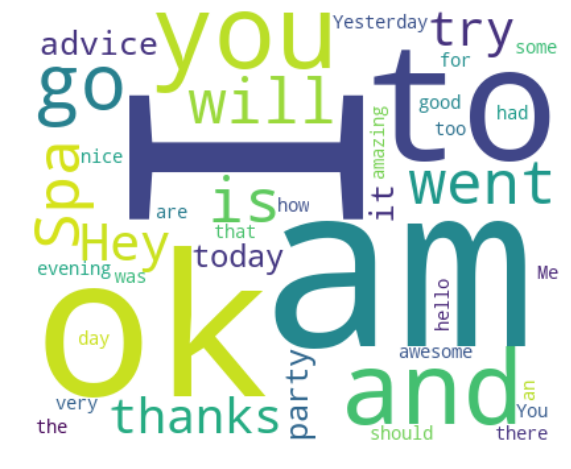

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Generate word frequencies
word_freq = gen_freq(corpus)

#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

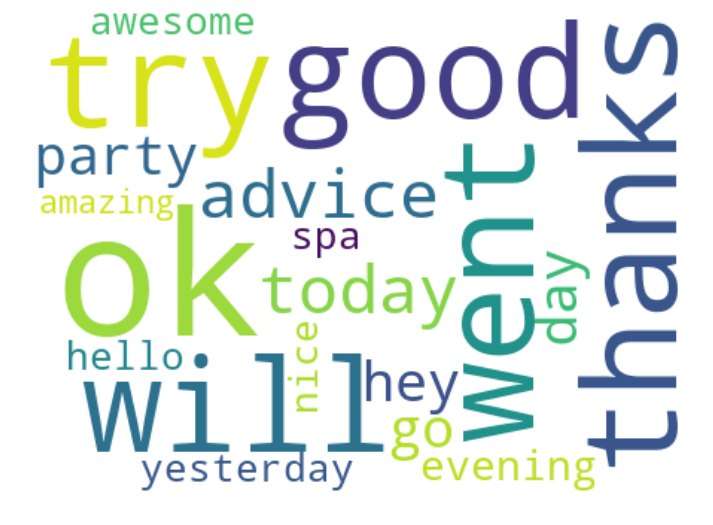

In [38]:
def clean_text(text):
    #Remove RT
    text = re.sub(r'RT', '', text)
    
    #Fix &
    text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)

    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text

from wordcloud import STOPWORDS

# print(STOPWORDS)

text = list(map(lambda x: clean_text(x), corpus))
word_freq = gen_freq(text)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## POS tagging

In [27]:
tokens = nltk.word_tokenize(sentence)

nltk.pos_tag(tokens) # don't pass the string directly but the tokens

[('I', 'PRP'),
 ('love', 'VBP'),
 ('my', 'PRP$'),
 ('lovely', 'JJ'),
 ('dog', 'NN'),
 (',', ','),
 ('elwin', 'NN'),
 ('.', '.'),
 ('She', 'PRP'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('nice', 'JJ')]

In [30]:
from nltk.corpus import wordnet

wordnet.synsets("computer")

[Synset('computer.n.01'), Synset('calculator.n.01')]

In [35]:
from nltk import ngrams

list(ngrams(tokens, 3))

[('I', 'love', 'my'),
 ('love', 'my', 'lovely'),
 ('my', 'lovely', 'dog'),
 ('lovely', 'dog', ','),
 ('dog', ',', 'elwin'),
 (',', 'elwin', '.'),
 ('elwin', '.', 'She'),
 ('.', 'She', 'is'),
 ('She', 'is', 'very'),
 ('is', 'very', 'nice')]

In [ ]:
from nltk import 

## Functions

In [41]:
def clean_text(text):
    #Filter to allow only alphabets
    text = re.sub(r'[^a-zA-Z\']', ' ', text)
    
    #Remove Unicode characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    #Convert to lowercase to maintain consistency
    text = text.lower()
       
    return text

In [ ]:
#Exhaustive list of stopwords in the english language. We want to focus less on these so at some point will have to filter
STOP_WORDS = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'also', 'am', 'an', 'and',
              'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below',
              'between', 'both', 'but', 'by', 'can', "can't", 'cannot', 'com', 'could', "couldn't", 'did',
              "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'else', 'ever',
              'few', 'for', 'from', 'further', 'get', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having',
              'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how',
              "how's", 'however', 'http', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it',
              "it's", 'its', 'itself', 'just', 'k', "let's", 'like', 'me', 'more', 'most', "mustn't", 'my', 'myself',
              'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'otherwise', 'ought', 'our', 'ours',
              'ourselves', 'out', 'over', 'own', 'r', 'same', 'shall', "shan't", 'she', "she'd", "she'll", "she's",
              'should', "shouldn't", 'since', 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs',
              'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", "they'll", "they're",
              "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', "wasn't",
              'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where',
              "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's", 'with', "won't", 'would', "wouldn't",
              'www', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves']

#Generate word frequency
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()
    
    #Drop the stopwords during the frequency calculation
    word_freq = word_freq.drop(STOP_WORDS, errors='ignore')
    
    return word_freq

#Check whether a negation term is present in the text
def any_neg(words):
    for word in words:
        if word in ['n', 'no', 'non', 'not'] or re.search(r"\wn't", word):
            return 1
    else:
        return 0

#Check whether one of the 100 rare words is present in the text
def any_rare(words, rare_100):
    for word in words:
        if word in rare_100:
            return 1
    else:
        return 0

#Check whether prompt words are present
def is_question(words):
    for word in words:
        if word in ['when', 'what', 'how', 'why', 'who']:
            return 1
    else:
        return 0

In [ ]:
word_freq = gen_freq(dataset.clean_text.str)
#100 most rare words in the dataset
rare_100 = word_freq[-100:]
#Number of words in a tweet
dataset['word_count'] = dataset.clean_text.str.split().apply(lambda x: len(x))
#Negation present or not
dataset['any_neg'] = dataset.clean_text.str.split().apply(lambda x: any_neg(x))
#Prompt present or not
dataset['is_question'] = dataset.clean_text.str.split().apply(lambda x: is_question(x))
#Any of the most 100 rare words present or not
dataset['any_rare'] = dataset.clean_text.str.split().apply(lambda x: any_rare(x, rare_100))
#Character count of the tweet
dataset['char_count'] = dataset.clean_text.apply(lambda x: len(x))

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset[['word_count', 'any_neg', 'any_rare', 'char_count', 'is_question']]
y = dataset.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=27)


from sklearn.naive_bayes import GaussianNB

#Initialize GaussianNB classifier
model = GaussianNB()
#Fit the model on the train dataset
model = model.fit(X_train, y_train)
#Make predictions on the test dataset
pred = model.predict(X_test)


from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, pred)*100, "%")

# feature creation

In [7]:
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]

In [10]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

## Bag of word model

### 1-gram

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

text = ["The quick brown fox jumped over the lazy dog."]

vectorizer = CountVectorizer()

vectorizer.fit(text)

print(vectorizer.vocabulary_)

vector = vectorizer.transform(text)

print(vector.shape)
print(type(vector))
print(vector.toarray())

{'dog': 1, 'the': 7, 'jumped': 3, 'lazy': 4, 'fox': 2, 'quick': 6, 'over': 5, 'brown': 0}
(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


In [64]:
text2 = ["I love my dog"]
vector = vectorizer.transform(text2)
print(vector.toarray())

[[0 1 0 0 0 0 0 0]]


In [ ]:
headlines = [
    "PretzelBros, airbnb for people who like pretzels, raises $2 million",
    "Top 10 reasons why Go is better than whatever language you use.",
    "Why working at apple stole my soul (I still love it though)",
    "80 things I think you should do immediately if you use python.",
    "Show HN: carjack.me -- Uber meets GTA"
]

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0.2, max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

vocab = cv.get_feature_names()
pd.DataFrame(cv_matrix, columns=vocab)

,bacon,beautiful,blue,brown,dog,eggs,fox,ham,lazy,love,quick,sausages,sky
0,0,1,1,0,0,0,0,0,0,0,0,0,1
1,0,1,1,0,0,0,0,0,0,1,0,0,1
2,0,0,0,1,1,0,1,0,1,0,1,0,0
3,1,0,0,0,0,1,0,1,0,0,0,1,0
4,1,0,0,0,0,1,0,1,0,1,0,1,0
5,0,0,1,1,1,0,1,0,1,0,1,0,0
6,0,1,1,0,0,0,0,0,0,0,0,0,2
7,0,0,0,1,1,0,1,0,1,0,1,0,0


### bigram

In [23]:
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_corpus)

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

,bacon eggs,beautiful sky,beautiful today,blue beautiful,blue dog,blue sky,breakfast sausages,brown fox,dog lazy,eggs ham,...,lazy dog,love blue,love green,quick blue,quick brown,sausages bacon,sausages ham,sky beautiful,sky blue,toast beans
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF

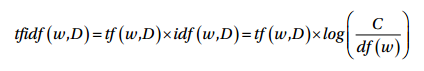

In [66]:
text = ["The quick brown fox jumped over the lazy dog.",
		"The dog.",
		"The fox"]

vectorizer = TfidfVectorizer()

vectorizer.fit(text)

print(vectorizer.vocabulary_)
print(vectorizer.idf_)

vector = vectorizer.transform([text[0]])

print(vector.toarray())

{'dog': 1, 'the': 7, 'jumped': 3, 'lazy': 4, 'fox': 2, 'quick': 6, 'over': 5, 'brown': 0}
[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]
[[0.36388646 0.27674503 0.27674503 0.36388646 0.36388646 0.36388646
  0.36388646 0.42983441]]


In [29]:
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


In [42]:
pd.Series(norm_corpus)

0                                   sky blue beautiful
1                              love blue beautiful sky
2                       quick brown fox jumps lazy dog
3    kings breakfast sausages ham bacon eggs toast ...
4                   love green eggs ham sausages bacon
5                        brown fox quick blue dog lazy
6                         sky blue sky beautiful today
7                             dog lazy brown fox quick
dtype: object

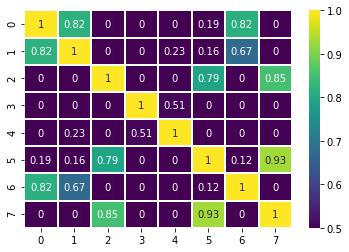

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
sns.heatmap(similarity_df, vmin = 0.5, cmap = "viridis", linewidths=1, annot=True)
plt.show()

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,2,7,0.253098,2
1,0,6,0.308539,2
2,5,8,0.386952,3
3,1,9,0.489845,3
4,3,4,0.732945,2
5,11,12,2.69565,5
6,10,13,3.45108,8


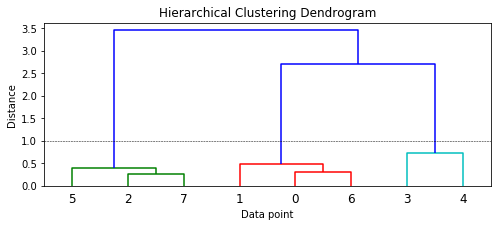

In [44]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

In [46]:
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, e...",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beaut...,weather
7,The dog is lazy but the brown fox is quick!,animals


In [47]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0

cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, e...",food,3
4,"I love green eggs, ham, sausages and bacon!",food,3
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beaut...,weather,2
7,The dog is lazy but the brown fox is quick!,animals,1


## Latent Dirichlet Allocation (LDA)

In [58]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3, max_iter=10000, random_state=42)
dt_matrix = lda.fit_transform(cv_matrix)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2', 'T3'])
features

,T1,T2,T3
0,0.832202,0.083522,0.084277
1,0.862786,0.069903,0.067311
2,0.055711,0.055736,0.888553
3,0.066856,0.866337,0.066808
4,0.057089,0.887214,0.055697
5,0.055474,0.047834,0.896692
6,0.865951,0.066809,0.067240
7,0.055711,0.055736,0.888553


In [60]:
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic)
    print()

[('kings', 4.332211381205823), ('beautiful', 3.3775745005592017), ('beans', 3.332158150510583), ('green', 1.3257745442727367)]

[('bacon', 2.3325832230737427), ('brown', 2.3325832230737427), ('eggs', 2.3325832230737427), ('jumps', 2.3325832230737427), ('green', 1.340159497912589)]

[('blue', 3.3320946406715293), ('breakfast', 3.3320946406715293), ('dog', 3.3320946406715293), ('fox', 3.3320946406715293), ('ham', 3.3320946406715293), ('beautiful', 1.2877896593138807)]



In [61]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(features)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, e...",food,0
4,"I love green eggs, ham, sausages and bacon!",food,0
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beaut...,weather,2
7,The dog is lazy but the brown fox is quick!,animals,1


## Hashing Vectorizer

In [67]:
from sklearn.feature_extraction.text import HashingVectorizer

text = ["The quick brown fox jumped over the lazy dog."]

vectorizer = HashingVectorizer(n_features=20)

vector = vectorizer.transform(text)

print(vector.shape)
print(vector.toarray())

(1, 20)
[[ 0.          0.          0.          0.          0.          0.33333333
   0.         -0.33333333  0.33333333  0.          0.          0.33333333
   0.          0.          0.         -0.33333333  0.          0.
  -0.66666667  0.        ]]
